In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import google

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df1 = pd.concat(pd.read_excel('indicadoressegurancapublicamunicmar20.xlsx', sheet_name=None), ignore_index=True)
df2 = pd.read_excel('indicadoressegurancapublicaufmar20_ocorrencias.xlsx')
df3 = pd.read_excel('indicadoressegurancapublicaufmar20_vítimas.xlsx')

In [3]:
df1.sample(10)

,Município,Sigla UF,Região,Mês/Ano,Vítimas
36834,Coronel Xavier Chaves,MG,SUDESTE,2018-02-01 00:00:00,0.0
105837,Santiago,RS,SUL,2019-12-01 00:00:00,0.0
46267,Engenheiro Navarro,MG,SUDESTE,2019-01-01 00:00:00,0.0
133745,Guaiçara,SP,SUDESTE,2020-03-01 00:00:00,NaN
63489,Arara,PB,NORDESTE,2018-05-01 00:00:00,1.0
37190,Pedra Dourada,MG,SUDESTE,2018-02-01 00:00:00,0.0
17397,Miraíma,CE,NORDESTE,2019-04-01 00:00:00,0.0
122748,Embaúba,SP,SUDESTE,2018-10-01 00:00:00,0.0
69768,Serranópolis Do Iguaçu,PR,SUL,2018-03-01 00:00:00,0.0
92929,Santana Do Seridó,RN,NORDESTE,2019-04-01 00:00:00,0.0


In [4]:
df2.sample(10)

,UF,Tipo Crime,Ano,Mês,Ocorrências
13724,São Paulo,Tentativa de homicídio,2017,março,341
6475,Mato Grosso do Sul,Roubo a instituição financeira,2017,setembro,1
2965,Ceará,Lesão corporal seguida de morte,2016,setembro,3
9278,Pernambuco,Estupro,2017,julho,82
2570,Bahia,Roubo a instituição financeira,2018,abril,0
14516,Sergipe,Estupro,2019,maio,71
1455,Amapá,Roubo seguido de morte (latrocínio),2018,maio,3
9843,Piauí,Roubo seguido de morte (latrocínio),2017,junho,5
3032,Ceará,Roubo seguido de morte (latrocínio),2017,abril,7
11416,Rio Grande do Sul,Furto de veículo,2016,junho,1599


In [5]:
df3.sample(10)

,UF,Tipo Crime,Ano,Mês,Vítimas
2936,Pernambuco,Roubo seguido de morte (latrocínio),2015,julho,12
4351,São Paulo,Roubo seguido de morte (latrocínio),2019,novembro,15
2596,Paraíba,Roubo seguido de morte (latrocínio),2018,maio,2
277,Alagoas,Roubo seguido de morte (latrocínio),2020,fevereiro,4
1173,Espírito Santo,Homicídio doloso,2016,outubro,93
1031,Distrito Federal,Homicídio doloso,2018,janeiro,34
2218,Minas Gerais,Roubo seguido de morte (latrocínio),2016,setembro,12
3471,Rio Grande do Norte,Lesão corporal seguida de morte,2019,setembro,18
4220,Santa Catarina,Roubo seguido de morte (latrocínio),2018,novembro,4
2668,Paraná,Homicídio doloso,2019,março,317


In [6]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(136529, 5)
(15180, 5)
(4671, 5)


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136529 entries, 0 to 136528
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Município  136529 non-null  object 
 1   Sigla UF   136529 non-null  object 
 2   Região     136529 non-null  object 
 3   Mês/Ano    136529 non-null  object 
 4   Vítimas    135292 non-null  float64
dtypes: float64(1), object(4)
memory usage: 5.2+ MB


In [8]:
df1 = df1.dropna()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135292 entries, 0 to 136528
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Município  135292 non-null  object 
 1   Sigla UF   135292 non-null  object 
 2   Região     135292 non-null  object 
 3   Mês/Ano    135292 non-null  object 
 4   Vítimas    135292 non-null  float64
dtypes: float64(1), object(4)
memory usage: 6.2+ MB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15180 entries, 0 to 15179
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   UF           15180 non-null  object
 1   Tipo Crime   15180 non-null  object
 2   Ano          15180 non-null  int64 
 3   Mês          15180 non-null  object
 4   Ocorrências  15180 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 593.1+ KB


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4671 entries, 0 to 4670
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UF          4671 non-null   object
 1   Tipo Crime  4671 non-null   object
 2   Ano         4671 non-null   int64 
 3   Mês         4671 non-null   object
 4   Vítimas     4671 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 182.6+ KB


In [12]:
df1['Vítimas'] = df1['Vítimas'].astype('Int64')
df1['Mês/Ano'] = pd.to_datetime(df1['Mês/Ano'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

In [13]:
df1["Ano"] = df1["Mês/Ano"].dt.year

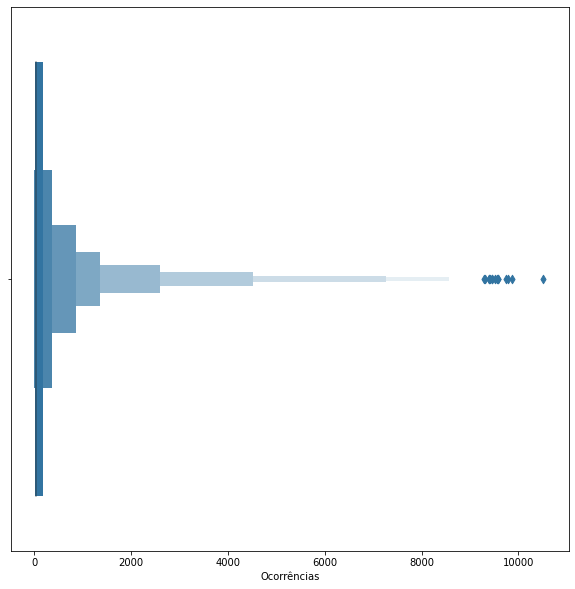

In [14]:
plt.figure(figsize=(10, 10))
sns.boxenplot(df2['Ocorrências'])

Text(0, 0.5, 'vitimas')

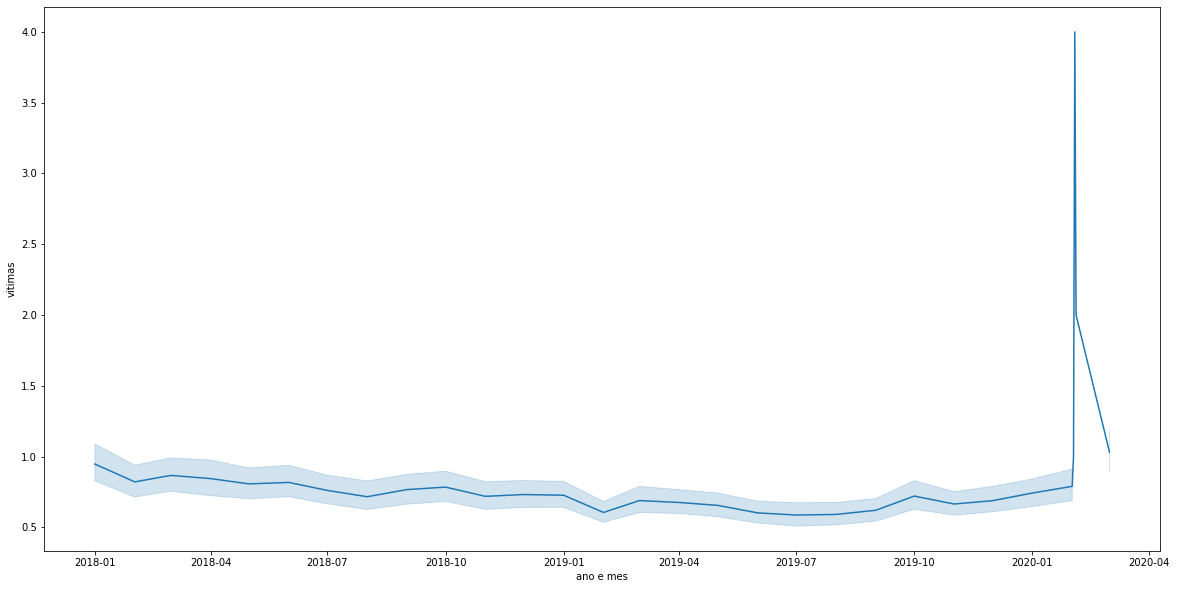

In [15]:
plt.figure(figsize=(20, 10))
g = sns.lineplot(x = df1['Mês/Ano'], y = df1['Vítimas'])
g.set_xlabel('ano e mes')
g.set_ylabel('vitimas')

In [16]:
df1_prov = df1.loc[df1['Mês/Ano'] <= '2020-01-01 00:00:00']

Text(0, 0.5, 'vitimas')

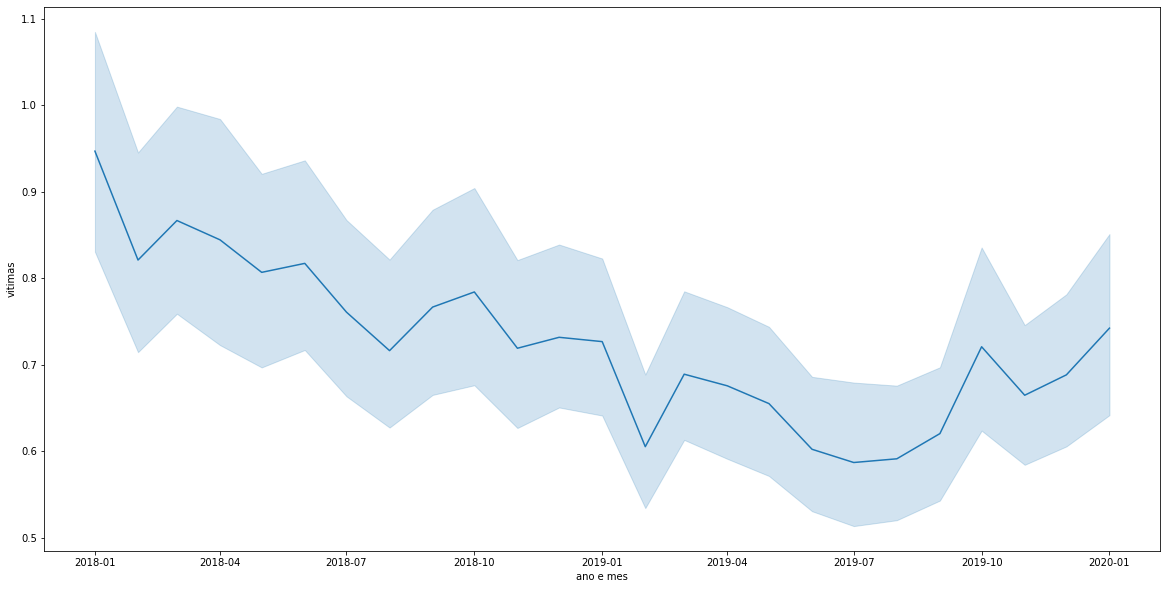

In [17]:
plt.figure(figsize=(20, 10))
g = sns.lineplot(x = df1_prov['Mês/Ano'], y = df1_prov['Vítimas'])
g.set_xlabel('ano e mes')
g.set_ylabel('vitimas')

Text(0, 0.5, 'Ocorrências')

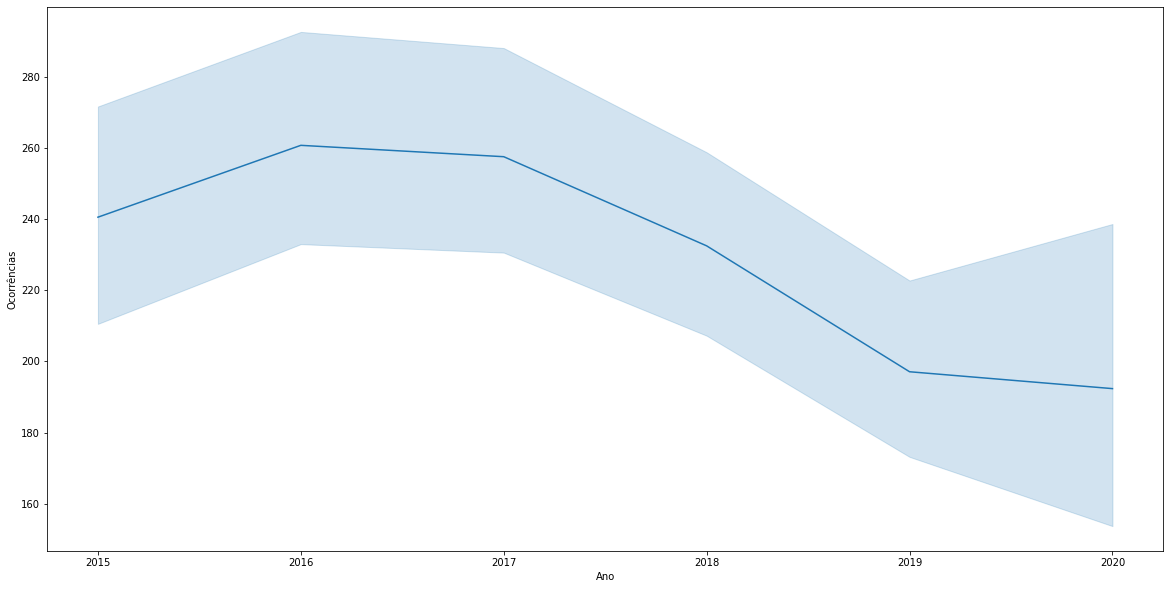

In [18]:
plt.figure(figsize=(20, 10))
g = sns.lineplot(x = df2['Ano'], y = df2['Ocorrências'])
g.set_xlabel('Ano')
g.set_ylabel('Ocorrências')

Text(0, 0.5, 'Vítimas')

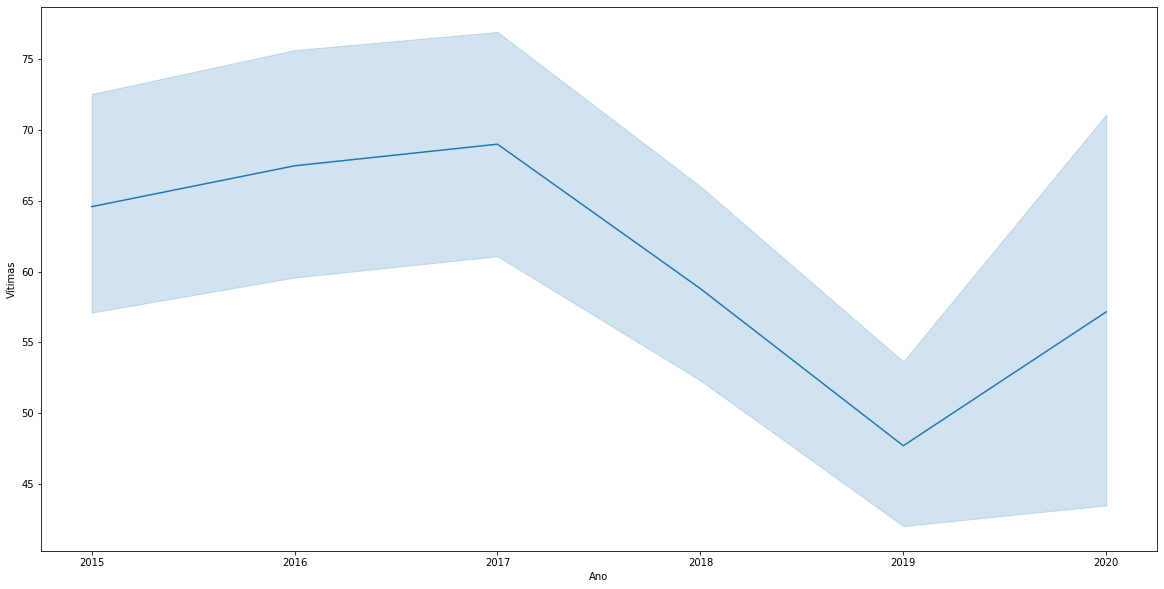

In [19]:
plt.figure(figsize=(20, 10))
g = sns.lineplot(x = df3['Ano'], y = df3['Vítimas'])
g.set_xlabel('Ano')
g.set_ylabel('Vítimas')

In [20]:
print(df1["Vítimas"].max())
print(df2["Ocorrências"].max())

157
10518


In [21]:
df1.groupby("Município")["Vítimas"].sum()

Município
ABADIA DE GOIÁS           1
ALEXÂNIA                  1
ALTO PARAÍSO DE GOIÁS     2
ANICUNS                   2
ANÁPOLIS                 12
                         ..
Áurea                     0
Ângulo                    0
Érico Cardoso             0
Óbidos                   20
Óleo                      2
Name: Vítimas, Length: 5436, dtype: Int64

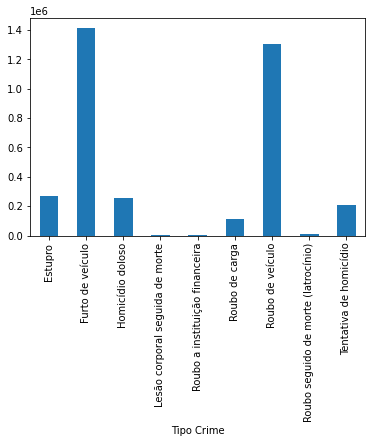

In [22]:
df2.groupby("Tipo Crime")["Ocorrências"].sum().plot.bar()

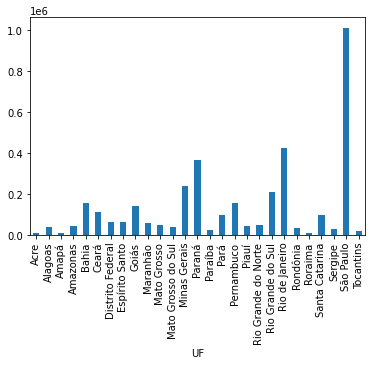

In [23]:
df2.groupby("UF")["Ocorrências"].sum().plot.bar()

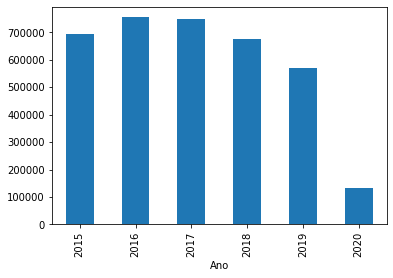

In [24]:
df2.groupby(df2["Ano"])["Ocorrências"].sum().plot.bar()

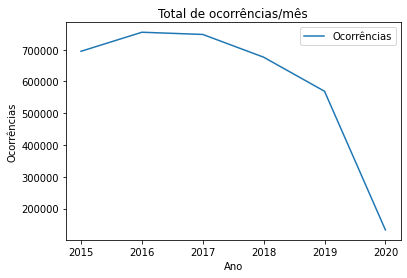

In [25]:
df2.groupby(df2["Ano"])["Ocorrências"].sum().plot(title = "Total de ocorrências/mês")
plt.xlabel("Ano")
plt.ylabel("Ocorrências")
plt.legend();

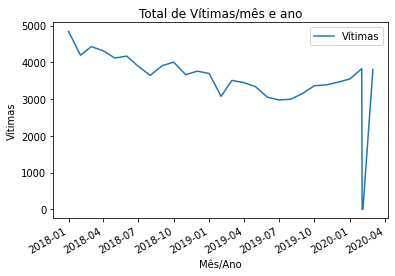

In [26]:
df1.groupby(df1["Mês/Ano"])["Vítimas"].sum().plot(title = "Total de Vítimas/mês e ano")
plt.xlabel("Mês/Ano")
plt.ylabel("Vítimas")
plt.legend();

GET ocorrências totais por UF - tabela 2 de ocorrências

In [27]:
# OK
# /ocorr/total/<UF:name>
df2_prov = df2.loc[df2['UF'] == 'Bahia']

In [28]:
df2_prov.groupby("UF")["Ocorrências"].sum()

UF
Bahia    157152
Name: Ocorrências, dtype: int64

GET vítimas totais por UF - tabela 3 de vítimas

In [29]:
# OK
# /vit/total/<UF:name>
df3_prov = df3.loc[df3['UF'] == 'Maranhão']

In [30]:
df3_prov.groupby("UF")["Vítimas"].sum()

UF
Maranhão    9974
Name: Vítimas, dtype: int64

GET vítimas por Municípios - tabela 1 de vítimas

In [31]:
# OK
# /vit/<Município:name>
df1_prov = df1.loc[df1['Município'] == 'Aracoiaba']

In [32]:
df1_prov.groupby("Município")["Vítimas"].sum()

Município
Aracoiaba    43
Name: Vítimas, dtype: Int64

GET ocorrências de um tipo de crime no Brasil - tabela 2 de ocorrências

In [33]:
# OK
# /ocorr/<Tipo Crime:name>
df2_prov = df2.loc[df2['Tipo Crime'] == 'Estupro']

In [34]:
df2_prov["Ocorrências"].sum()

266590

GET vítimas de um tipo de crime no Brasil - tabela 3 de vítimas

In [35]:
# OK
# /vit/br/<Tipo Crime:name>
df3_prov = df3.loc[df3['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)']

In [36]:
df3_prov["Vítimas"].sum()

11348

**GET** ocorrências de um tipo de crime em um estado - tabela 2 de ocorrências

In [37]:
# OK
# /ocorr/<Tipo Crime:name>/<UF:name>
df2_prov = df2.loc[df2['Tipo Crime'] == 'Estupro']

In [38]:
df2_prov = df2_prov.loc[df2_prov['UF'] == 'Tocantins']

In [39]:
df2_prov["Ocorrências"].sum()

3002

GET vítimas de um tipo de crime em um estado - tabela 3 de vítimas

In [40]:
# OK
# /vit/<Tipo Crime:name>/<UF:name>
df3_prov = df3.loc[df3['Tipo Crime'] == 'Homicídio doloso']

In [41]:
df3_prov = df3_prov.loc[df3_prov['UF'] == 'Roraima']

In [42]:
df3_prov["Vítimas"].sum()

967

GET vítimas por Ano - tabela 1 de vítimas

In [43]:
# OK
# /vit/epoc/<Ano:name>
df1_prov = df1.loc[df1['Ano'] == 2020]

In [44]:
df1_prov["Vítimas"].sum()

11189

GET vítimas de um tipo de crime por ano - tabela 3 de vítimas

In [45]:
# OK
# /vit/crim/epoc/<Tipo Crime:name>/<Ano:name>
df3_prov = df3.loc[df3['Tipo Crime'] == 'Homicídio doloso']

In [46]:
df3_prov = df3_prov.loc[df3_prov['Ano'] == 2020]

In [47]:
df3_prov["Vítimas"].sum()

11505

GET ocorrências de um tipo de crime por ano - tabela 2 de ocorrências

In [48]:
# OK
# /ocorr/crim/epoc/<Tipo Crime:name>/<Ano:name>
df2_prov = df2.loc[df2['Tipo Crime'] == 'Estupro']

In [49]:
df2_prov = df2_prov.loc[df2_prov['Ano'] == 2016]

In [50]:
df2_prov["Ocorrências"].sum()

48402

GET tipos de crime - tabela 2 de ocorrências

In [51]:
# OK
# /ocorr/crim/tipos
np.unique(df2['Tipo Crime'])

array(['Estupro', 'Furto de veículo', 'Homicídio doloso',
       'Lesão corporal seguida de morte',
       'Roubo a instituição financeira', 'Roubo de carga',
       'Roubo de veículo', 'Roubo seguido de morte (latrocínio)',
       'Tentativa de homicídio'], dtype=object)

GET tipos de crime - tabela 3 de vítimas

In [52]:
# OK
# /vit/crim/tipos
np.unique(df3['Tipo Crime'])

array(['Homicídio doloso', 'Lesão corporal seguida de morte',
       'Roubo seguido de morte (latrocínio)'], dtype=object)

GET top 10 municípios com mais vítimas - tabela 1 de vítimas

In [53]:
# OK
# /max/munc/vit
df1_prov = df1.groupby("Município")["Vítimas"].sum()

In [54]:
df1_prov.nlargest(10)

Município
Rio De Janeiro    2761
Salvador          2445
Fortaleza         2417
Manaus            1945
São Paulo         1524
Belém             1376
Recife            1179
Porto Alegre      1077
Maceió             863
Belo Horizonte     860
Name: Vítimas, dtype: Int64

GET top 10 municípios com menos vítimas - tabela 1 de vítimas

In [55]:
# OK
# /min/munc/vit
df1_prov = df1.groupby("Município")["Vítimas"].sum()

In [56]:
df1_prov.nsmallest(10)

Município
Abaíra               0
Aceguá               0
Adolfo               0
Afonso Cunha         0
Agricolândia         0
Aiuruoca             0
Alambari             0
Albertina            0
Alfredo Chaves       0
Alfredo Marcondes    0
Name: Vítimas, dtype: Int64

GET top 10 estados com mais vítimas - tabela 1 de vítimas

In [57]:
# OK
# /max/estad/vit
df1_prov = df1.groupby("Sigla UF")["Vítimas"].sum()

In [58]:
df1_prov.nlargest(10)

Sigla UF
BA    11982
RJ    10007
PE     8155
CE     7678
PA     7069
MG     6538
SP     6492
RS     5004
PR     4312
GO     4161
Name: Vítimas, dtype: Int64

GET top 10 estados com menos vítimas - tabela 1 de vítimas

In [59]:
# OK
# /min/estad/vit
df1_prov = df1.groupby("Sigla UF")["Vítimas"].sum()

In [60]:
df1_prov.nsmallest(10)

Sigla UF
RR     372
AP     603
RO     766
AC     779
TO     815
DF     923
MS    1097
PI    1240
SC    1697
MT    1901
Name: Vítimas, dtype: Int64

GET top 10 estados com mais ocorrências - tabela 2 de ocorrências

In [61]:
# OK
# /max/estad/ocorr
df2_prov = df2.groupby("UF")["Ocorrências"].sum()

In [62]:
df2_prov.nlargest(10)

UF
São Paulo            1010726
Rio de Janeiro        425553
Paraná                363780
Minas Gerais          236240
Rio Grande do Sul     207938
Bahia                 157152
Pernambuco            156957
Goiás                 139249
Ceará                 109097
Pará                   95954
Name: Ocorrências, dtype: int64

GET top 10 estados com menos ocorrências - tabela 2 de ocorrências

In [63]:
# OK
# /min/estad/ocorr
df2_prov = df2.groupby("UF")["Ocorrências"].sum()

In [64]:
df2_prov.nsmallest(10)

UF
Acre                   8226
Roraima                9222
Amapá                 10487
Tocantins             20243
Paraíba               22881
Sergipe               28979
Rondônia              33976
Alagoas               36792
Mato Grosso do Sul    39359
Amazonas              42323
Name: Ocorrências, dtype: int64